# Bonding Curve Params Configuration

In [175]:
import math
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize, root

initial_mc=750
graduation_mc=75000
total_supply = 1e12  # Total supply of tokens
target_eth = 100  # Target ETH to be raised
supply_sold_param=0.25


initial_price = (initial_mc/total_supply)*10e6 # Initial price in ETH
graduation_price = (graduation_mc/total_supply)*10e6  # Graduation price in ETH

initial_supply = 1  # Starting from 0 supply
max_supply_sold = 10000#supply_sold_param * total_supply

# Define the system of equations for initial price and graduation price constraints
def equations(vars):
    a, b = vars
    eq1 = a * np.exp(b * initial_supply) - initial_price
    eq2 = a * np.exp(b * max_supply_sold) - graduation_price
    return [eq1, eq2]

# Initial guess
initial_guess = [initial_price, 1e-10]

# Solve the initial system of equations for a and b
solution = root(equations, initial_guess)

# Extract the initial solution
a_initial, b_initial = solution.x
print(f"{a_initial},{b_initial}")


def total_accumulated_eth(a, b, initial_supply, max_supply_sold):
    integral, _ = quad(lambda x: a * np.exp(b * x), initial_supply, max_supply_sold)
    return integral

# Define the cost function for adjusting a and b to meet accumulated ETH constraint
def cost_function(vars):
    a, b = vars
    integral, _ = quad(lambda x: a * np.exp(b * x), initial_supply, max_supply_sold)
    return (integral - target_eth)**2

# Optimize a and b to meet accumulated ETH constraint
optimized_solution = minimize(cost_function, [a_initial, b_initial], method='Nelder-Mead')

# Extract the optimized solution
a_optimized, b_optimized = optimized_solution.x

def price_function(x):
    return a_optimized * math.exp(b_optimized * x)

# Verify the final accumulated ETH
accumulated_eth_final = total_accumulated_eth(a_optimized, b_optimized, initial_supply, max_supply_sold)

# Calculate tokens sold
tokens_sold = max_supply_sold

# Calculate the average price of tokens sold
avg_price = accumulated_eth_final / tokens_sold

#a=a_optimized
#b=b_optimized

a_optimized, b_optimized, accumulated_eth_final, avg_price,tokens_sold,price_function(initial_supply),price_function(max_supply_sold),price_function(max_supply_sold)*total_supply,price_function(initial_supply)*total_supply


0.0075,1e-10


(0.010000665128231048,
 1.1082650899887087e-10,
 99.99670603414235,
 0.009999670603414236,
 10000,
 0.010000665129339387,
 0.010000676211625228,
 10000676211.625227,
 10000665129.339388)

In [183]:

#a = 0.0000000008
#b = 0.000000000742
a=7.5e-10
b=7.425e-12
max_supply_sold=9.27e10
a = 7.94e-10
b = 3.26e-11

liq_accumulated = (a / b) * (math.exp(b * max_supply_sold) - 1)
liq_accumulated,price_function(0),price_function(max_supply_sold)

(475.7357173848574, 0.010000665128231048, 289.6037788143323)

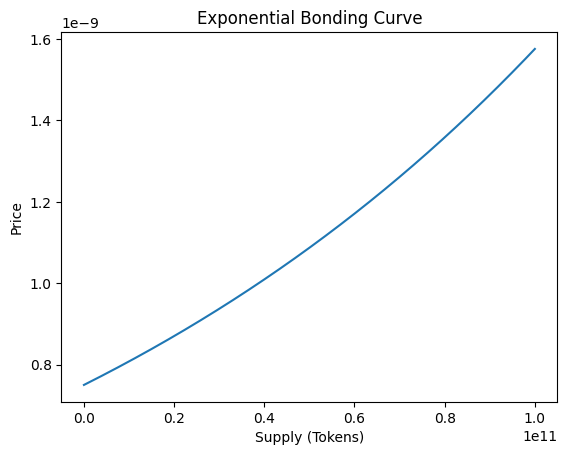

Plotted the exponential bonding curve.


In [173]:
import matplotlib.pyplot as plt
import numpy as np

a = 7.5e-10
b = 7.425e-12

supply = np.linspace(0, 10e10, 1000)
price = a * np.exp(b * supply)

plt.plot(supply, price)
plt.xlabel('Supply (Tokens)')
plt.ylabel('Price')
plt.title('Exponential Bonding Curve')
plt.show()
print('Plotted the exponential bonding curve.')

In [182]:
a = 7.5e-10
b = 7.425e-12
price_function(9.27e10)

289.6037788143323

In [169]:
(6.12e9/1e12)*100

0.612

In [170]:
(9.27e10/1e12)*100

9.27

In [147]:
tokens_sold = total_usd_invested / (a * math.exp(b * max_supply_sold  / 2))
tokens_sold 

6130155336.329387

In [184]:
(a / b) * (math.exp(b * max_supply_sold)-math.exp(b * initial_supply))

475.73571738406343

# Swap Functions

In [113]:
a=a_optimized
b=b_optimized
import numpy as np


def tokens_for_eth(eth_amount, a, b, current_supply):
    return (1 / b) * np.log((eth_amount * b / a) + np.exp(b * current_supply))

def eth_for_tokens(tokens, a, b, current_supply):
    return (a / b) * (np.exp(b * (tokens + current_supply)) - np.exp(b * current_supply))

# Example usage
current_supply = 0

# First user buys 1 ETH worth of tokens
eth_amount1 = 100
tokens_bought1 = tokens_for_eth(eth_amount1, a, b, current_supply)
new_supply1 = current_supply + tokens_bought1

# Second user buys 2 ETH worth of tokens
#eth_amount2 = 2
#tokens_bought2 = tokens_for_eth(eth_amount2, a, b, new_supply1) - new_supply1
#new_supply2 = new_supply1 + tokens_bought2

# User sells some tokens
tokens_sold = tokens_bought1
eth_received = eth_for_tokens(tokens_sold, a, b, new_supply1)

print(f"Tokens bought for {eth_amount1}ETH: {tokens_bought1:.2f} tokens")
print(f"Supply after first purchase: {new_supply1:.2f} tokens")
#print(f"Tokens bought for 2 ETH: {tokens_bought2:.2f} tokens")
#print(f"Supply after second purchase: {new_supply2:.2f} tokens")
print(f"ETH received for selling {tokens_sold:.2f} tokens: {eth_received:.2f} ETH")

Tokens bought for 100ETH: 50001147615.53 tokens
Supply after first purchase: 50001147615.53 tokens
ETH received for selling 50001147615.53 tokens: 510.26 ETH


## Simulations

In [45]:
import math

def tokens_for_eth(eth_amount, a, b, current_supply):
    return (1 / b) * np.log((eth_amount * b / a) + np.exp(b * current_supply))

# Function to calculate the ETH received for selling tokens
def eth_for_tokens(tokens, a, b, current_supply):
    return (a / b) * (np.exp(b * (tokens + current_supply)) - np.exp(b * current_supply))


def simulate_bonding_curve(eth_amount, a, b,current_supplies ):
    for current_supply in current_supplies:
        tokens_purchased= tokens_for_eth(eth_amount, a, b,current_supply)
        eth_received = eth_for_tokens(tokens_purchased, a, b, current_supply+tokens_purchased)

        print(f"Initial supply: {current_supply} USD")
        print(f"Tokens purchased for {eth_amount} ETH: {tokens_purchased}")
        print(f"ETH received for selling {tokens_purchased} tokens: {eth_received}")
        print(f"Avg ETH Price per token {eth_amount/tokens_purchased}")

        if eth_received > eth_amount:
            print("Exploitation detected: Trader can get more ETH than initially spent.")
        else:
            print("No exploitation: Trader cannot get more ETH than initially spent.")
        print("---------------------------------------------------")


eth_amount = 1  # Amount of ETH used for the trade

current_supplies = [1, 1e6,2e7,1e8,2e8]  

# Simulate bonding curve
simulate_bonding_curve(eth_amount, a, b,current_supplies)


Initial supply: 1 USD
Tokens purchased for 1 ETH: 1097081235.0433102
ETH received for selling 1097081235.0433102 tokens: 0.9925648493060519
Avg ETH Price per token 9.115095291558081e-10
No exploitation: Trader cannot get more ETH than initially spent.
---------------------------------------------------
Initial supply: 1000000.0 USD
Tokens purchased for 1 ETH: 1098088724.9086628
ETH received for selling 1098088724.9086628 tokens: 0.9934593910226925
Avg ETH Price per token 9.106732245913721e-10
No exploitation: Trader cannot get more ETH than initially spent.
---------------------------------------------------
Initial supply: 20000000.0 USD
Tokens purchased for 1 ETH: 1117231061.2474227
ETH received for selling 1117231061.2474227 tokens: 1.0104498506269657
Avg ETH Price per token 8.950699946378767e-10
Exploitation detected: Trader can get more ETH than initially spent.
---------------------------------------------------
Initial supply: 100000000.0 USD
Tokens purchased for 1 ETH: 11978305

In [107]:
import math
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize, root

# Given values
initial_mc = 750
graduation_mc = 75000
total_supply = 1e12  # Total supply of tokens
target_eth = 100  # Target ETH to be raised
supply_sold_param = 0.05

initial_price = initial_mc / total_supply  # Initial price in ETH
graduation_price = graduation_mc / total_supply  # Graduation price in ETH

initial_supply = 0  # Starting from 0 supply
max_supply_sold = supply_sold_param * total_supply

# Define the system of equations for initial price and graduation price constraints
def equations(vars):
    a, b = vars
    eq1 = a * np.exp(b * initial_supply) - initial_price
    eq2 = a * np.exp(b * max_supply_sold) - graduation_price
    return [eq1, eq2]

# Initial guess
initial_guess = [initial_price, 1e-10]

# Solve the initial system of equations for a and b
solution = root(equations, initial_guess)

# Extract the initial solution
a_initial, b_initial = solution.x

def total_accumulated_eth(a, b, initial_supply, max_supply_sold):
    integral, _ = quad(lambda x: a * np.exp(b * x), initial_supply, max_supply_sold)
    return integral

# Define the cost function for adjusting a and b to meet accumulated ETH constraint
def cost_function(vars):
    a, b = vars
    integral, _ = quad(lambda x: a * np.exp(b * x), initial_supply, max_supply_sold)
    return (integral - target_eth)**2

# Optimize a and b to meet accumulated ETH constraint
optimized_solution = minimize(cost_function, [a_initial, b_initial], method='Nelder-Mead')

# Extract the optimized solution
a_optimized, b_optimized = optimized_solution.x

print(a_optimized)
print(b_optimized)

def price_function(x):
    return a_optimized * math.exp(b_optimized * x)

# Verify the final accumulated ETH
accumulated_eth_final = total_accumulated_eth(a_optimized, b_optimized, initial_supply, max_supply_sold)

# Calculate tokens sold
tokens_sold = max_supply_sold

# Calculate the average price of tokens sold
avg_price = accumulated_eth_final / tokens_sold

# Swap functions
def tokens_for_eth(eth_amount, a, b, current_supply):
    return (1 / b) * np.log((eth_amount * b / a) + np.exp(b * current_supply))

def eth_for_tokens(tokens, a, b, current_supply):
    return (a / b) * (np.exp(b * (tokens + current_supply)) - np.exp(b * current_supply))

# Simulations
current_supplies = [0, 100000, 200000, 300000, 400000, 500000, 900000, 10000000]
simulation_results = []

for supply in current_supplies:
    eth_amount = 1
    tokens_bought = tokens_for_eth(eth_amount, a_optimized, b_optimized, supply)
    eth_received = eth_for_tokens(tokens_bought, a_optimized, b_optimized, supply + tokens_bought)
    simulation_results.append((supply, tokens_bought, eth_received))

simulation_results


7.944823502562954e-10
3.259408406787067e-11


[(0, 1233547273.630874, 1.0410255609295245),
 (100000, 1233643332.7577355, 1.0411149217936233),
 (200000, 1233739391.8969345, 1.041204284027306),
 (300000, 1233835451.0484695, 1.041293647630594),
 (400000, 1233931510.212346, 1.041383012603504),
 (500000, 1234027569.388563, 1.0414723789460572),
 (900000, 1234411806.2168078, 1.0418298580129897),
 (10000000, 1243153247.3874805, 1.0499684294866598)]

In [101]:
a_optimized,b_optimized

(7.944823502562954e-10, 3.259408406787067e-11)

In [99]:
b_optimized

3.259408406787067e-11

In [102]:
price_function(1.395e11)

7.494917516180929e-08

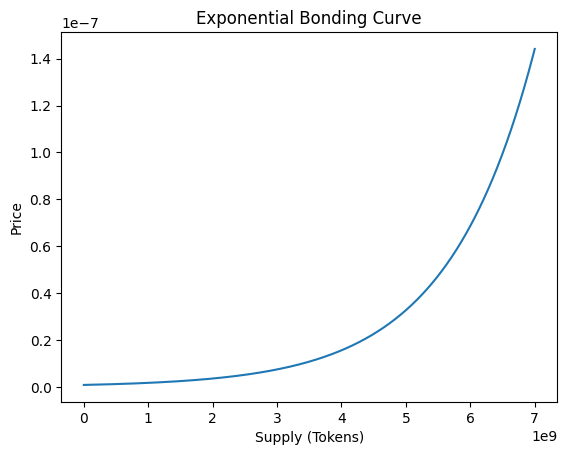

Plotted the exponential bonding curve.


In [150]:
import matplotlib.pyplot as plt
import numpy as np

a = 0.0000000008
b = 0.000000000742

supply = np.linspace(0, 7e9, 1000)
price = a * np.exp(b * supply)

plt.plot(supply, price)
plt.xlabel('Supply (Tokens)')
plt.ylabel('Price')
plt.title('Exponential Bonding Curve')
plt.show()
print('Plotted the exponential bonding curve.')

In [154]:
price_function(6e9)

9.660883360617143e-10

In [140]:
import numpy as np

def eth_for_token(x_0, a, b, eth_amount):
    """
    Calculate the number of tokens given an amount of ETH.
    """
    delta_x = (1 / b) * np.log((eth_amount * b / a) + np.exp(b * x_0)) - x_0
    return delta_x

def token_for_eth(x_0, a, b, delta_x):
    """
    Calculate the amount of ETH given a number of tokens.
    """
    eth_amount = (a / b) * (np.exp(b * (x_0 + delta_x)) - np.exp(b * x_0))
    return eth_amount

# Parameters
#a = 7.94e-10
#b = 3.26e-11
a = 0.0000000008
b = 0.000000000742

# Example usage
x_0 = 0  # initial circulating supply
eth_amount = 100  # 1 ETH

# Calculate tokens for given ETH
tokens = eth_for_token(x_0, a, b, eth_amount)
print(f"Tokens for 1 ETH: {tokens}")

# Calculate ETH for given tokens
eth_received = token_for_eth(x_0, a, b, tokens)
print(f"ETH received for {tokens} tokens: {eth_received}")


Tokens for 1 ETH: 6119449683.086954
ETH received for 6119449683.086954 tokens: 99.99999999999996


In [142]:
def eth_for_token(x_0, a, b, eth_amount):
    """
    Calculate the number of tokens given an amount of ETH.
    """
    new_supply = x_0
    delta_x = (1 / b) * np.log((eth_amount * b / a) + np.exp(b * new_supply)) - x_0
    return delta_x

def token_for_eth(x_0, a, b, tokens):
    """
    Calculate the amount of ETH given a number of tokens.
    """
    new_supply = x_0 + tokens
    eth_amount = (a / b) * (np.exp(b * new_supply) - np.exp(b * x_0))
    return eth_amount

# Parameters
a = 0.0000000008
b = 0.000000000742
# Initial circulating supply
x_0 = 0
# Step 1: Calculate tokens for given ETH
eth_amount = 100  # 1 ETH
tokens_bought = eth_for_token(x_0, a, b, eth_amount)
x_0 += tokens_bought  # Update circulating supply after purchase

# Step 2: Calculate ETH for given tokens using updated supply
eth_received = token_for_eth(x_0, a, b, -tokens_bought)

tokens_bought, eth_received

(6119449683.086954, -99.99999999999996)

In [143]:
import numpy as np

def eth_for_token(x_0, a, b, eth_amount):
    """
    Calculate the number of tokens given an amount of ETH.
    """
    delta_x = (1 / b) * np.log((eth_amount * b / a) + np.exp(b * x_0)) - x_0
    return delta_x

def token_for_eth(x_0, a, b, tokens):
    """
    Calculate the amount of ETH given a number of tokens.
    """
    new_supply = x_0 - tokens  # Selling decreases the circulating supply
    eth_amount = (a / b) * (np.exp(b * x_0) - np.exp(b * new_supply))
    return eth_amount
# Parameters
#a = 7.94e-10
#b = 3.26e-11
a = 0.0000000008
b = 0.000000000742

# Initial circulating supply
x_0 = 100000

# Step 1: Calculate tokens for given ETH
eth_amount = 10  # 1 ETH
tokens_bought = eth_for_token(x_0, a, b, eth_amount)
x_0 += tokens_bought  # Update circulating supply after purchase

eth_amount = 5  # 1 ETH
tokens_bought = eth_for_token(x_0, a, b, eth_amount)
x_0 += tokens_bought  # Update circulating supply after purchase

# Step 2: Calculate ETH for given tokens using updated supply
eth_received = token_for_eth(x_0, a, b, tokens_bought)

print(f"Tokens bought for 1 ETH: {tokens_bought}")
print(f"ETH received for selling the tokens: {eth_received}")
print(f"Does the ETH received match the initial ETH spent? {np.isclose(eth_amount, eth_received)}")


Tokens bought for 1 ETH: 501999705.1919899
ETH received for selling the tokens: 5.000000000000003
Does the ETH received match the initial ETH spent? True
